In [36]:
from utils import *

# Load env 
env = read_env(jupyter=True)
patientNr, path, maxPatient = env.patientNr, env.path, env.maxPatient


In [37]:
# Perform optimization
all_ISF = []
all_CGM = []
for patientNr in tqdm(range(1000)):
    patient = Sim.Patient(patientNr)

    patient.steadyState()

    Bolus = 100 # We give 0.1 U corresponding 100 mU
    Bolus = Bolus / 5 # Update to get it as a sampling rate we have Ts = 5

    patient.simulate(Bolus, 0, patient.xSS, nsimHours = 35)

    ISF = (patient.target - min(patient.CGM))/0.1 # Here we use 0.1 U to get back to proper units!
    all_ISF.append(ISF)
    all_CGM.append(patient.CGM)



100%|██████████| 1000/1000 [04:18<00:00,  3.87it/s]


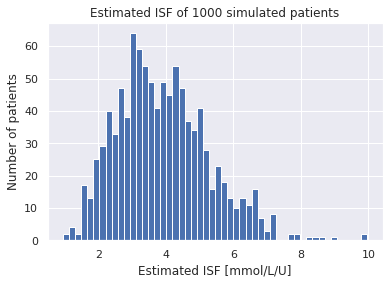

In [54]:
plt.figure()
plt.hist(all_ISF,bins = 50)
plt.title('Estimated ISF of 1000 simulated patients')
plt.ylabel('Number of patients')
plt.xlabel('Estimated ISF [mmol/L/U]')
plt.savefig('figures/ISF_hist.pdf', dpi=150)
plt.show()

In [39]:
patient_sim = np.array(all_CGM)

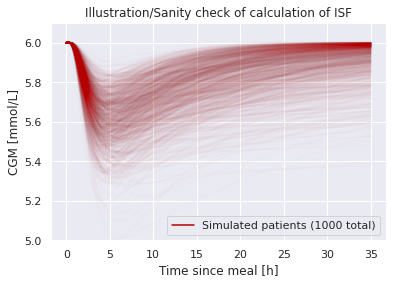

In [60]:
time = np.linspace(0,420, 420)*5/60
plt.title('Illustration/Sanity check of calculation of ISF')
plt.plot(time,patient_sim.T,color=(0.7,0.0,0.0),linewidth=2, alpha = 0.01)
plt.plot(0,0,color=(0.7,0.0,0.0), label = 'Simulated patients (1000 total)')
plt.xlabel('Time since meal [h]')
plt.ylabel('CGM [mmol/L]')
plt.ylim(5,6.1)
plt.legend()
plt.savefig('figures/ISF_CGM.pdf', dpi=150)
plt.show()

In [51]:
np.savez('simulations/calculate_ISF/ISF', patient_sim = patient_sim, all_ISF = np.array(all_ISF))